In [1]:
import os
from matplotlib import pyplot
import numpy as np
import torch
from scipy.spatial.transform import Rotation
import pickle
from PIL import Image
from IPython.display import display
from ipywidgets import interact
from importlib import reload
import functools
import tqdm
import cv2

In [2]:
import face3drotationaugmentation.vis as vis
import face3drotationaugmentation.facemodel.bfm as bfm

In [10]:
%matplotlib notebook

In [13]:
model = bfm.BFMModel(exp_dim=20)

In [14]:
vert = np.ascontiguousarray(model.scaled_vertices.T)
base_magnitudes_per_point = np.linalg.norm(model.scaled_bases,axis=-1)

<IPython.core.display.Javascript object>


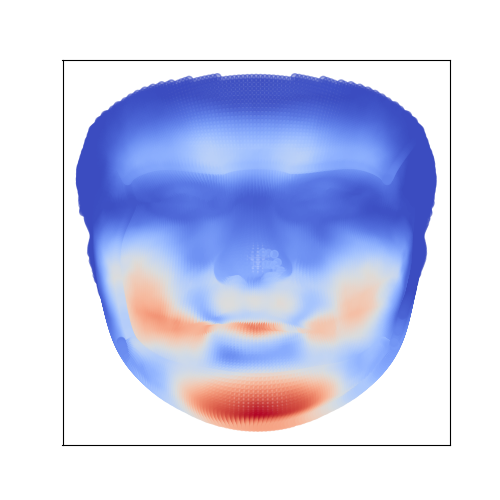

interactive(children=(IntSlider(value=24, description='i', max=49), Output()), _dom_classes=('widget-interact'…

In [15]:
fig, ax = pyplot.subplots(1,1,figsize=(5,5))

@interact(i=(0,len(base_magnitudes_per_point)-1))
def show_basis(i):
    b = base_magnitudes_per_point[i]
    ax.clear()
    ax.scatter(vert[0], -vert[1], s = 30., alpha=0.5, c = b, cmap='coolwarm')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)